In [217]:
##how many columns
import calendar as cld
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

fh = 'train.csv'
df = pd.read_csv(fh)

print(len(df.columns))

12


In [218]:
##how many rows
print(len(df))

10886


In [219]:
##what are the datatype
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [220]:
##Are there missing values in each columns
df.isnull().sum()
##no missing value in each column


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [221]:
#feature engineer
def get_season(season_num):
    if season_num == 1:
        return 'Spring'
    elif season_num == 2:
        return 'Summer'
    elif season_num == 3:
        return 'Fall'
    elif season_num == 4:
        return 'Winter'
    
def get_weather(weather_num):
    if weather_num == 1:
        return 'Clear'
    elif weather_num == 2:
        return 'Mist + Cloudy'
    elif weather_num == 3:
        return 'Light Snow'
    elif weather_num == 4:
        return 'Snow + Fog '
 
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].map(lambda x: x.hour)
df['month'] = df['datetime'].map(lambda x: x.month)
df['date'] = df['datetime'].map(lambda x: str(datetime.date(x))[5:])
df['season_cat'] = df['season'].map(get_season).astype('category')
df['weather_cat'] = df['weather'].map(get_weather).astype('category')
df['week_day'] = df['datetime'].map(lambda x: cld.day_name[x.weekday()-1])
df.columns
new_df = df[['datetime','holiday', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'date', 'season_cat', 'weather_cat', 'week_day']]

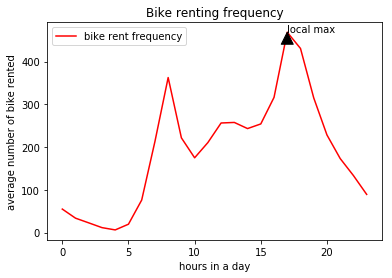

In [263]:
%matplotlib inline
##What hour of a day are bikes rented most?
result = df['count'].groupby(df['hour']).mean()
result = result.reset_index()
count_max = result['count'].max()
hour_loc = result.loc[result['count'] == result['count'].max()]['hour']

plt.plot(result['hour'], result['count'], color='r')
plt.title('Bike renting frequency')
plt.xlabel('hours in a day')
plt.ylabel('average number of bike rented')
plt.annotate('local max', xy=(hour_loc, count_max), 
            arrowprops=dict(facecolor='black', shrink=1),
            )
plt.legend(['bike rent frequency'])
##Bike is rented most at 5PM

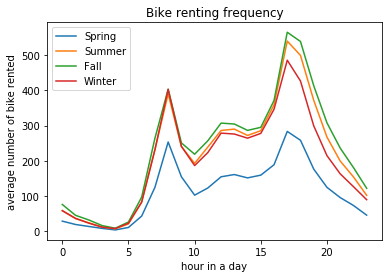

In [223]:
%matplotlib inline
#At what season and what hour of a day are bikes rented most?
result_season_hour = df.groupby([df['hour'],df['season_cat']]).mean()['count'].to_frame().reset_index()
#print(result_season_hour.loc[lambda x: x.])


#data = result_season_hour['count']
t1 = result_season_hour.loc[lambda x: x['season_cat'] == 'Spring']
t2 = result_season_hour.loc[lambda x: x['season_cat'] == 'Summer']
t3 = result_season_hour.loc[lambda x: x['season_cat'] == 'Fall']
t4 = result_season_hour.loc[lambda x: x['season_cat'] == 'Winter']

plt.plot(t1['hour'],t1['count'])
plt.plot(t2['hour'],t2['count'])
plt.plot(t3['hour'],t3['count'])
plt.plot(t4['hour'],t4['count'])
plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
plt.legend(['Spring','Summer','Fall','Winter'])

##regardless of the season, bike is mostly rented at 5pm


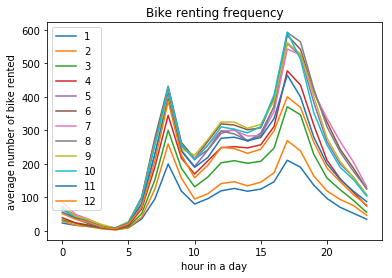

In [224]:
%matplotlib inline
##At which month and what hour of a day are bikes rented most?

def get_month(datetime):
    return datetime.month

df['month'] = df['datetime'].apply(get_month)

result_month_hour = df.groupby([df['hour'],df['month']]).mean()['count'].to_frame().reset_index()

for i in range(1,13):
    temp = result_month_hour.loc[lambda x: x['month'] == i]
    plt.plot(temp['hour'],temp['count'])
    


plt.title('Bike renting frequency')
plt.xlabel('hour in a day')
plt.ylabel('average number of bike rented')
month_index = range(1,13)
plt.legend(month_index)

## regardless of the month, bike is mostly rented at 5pm


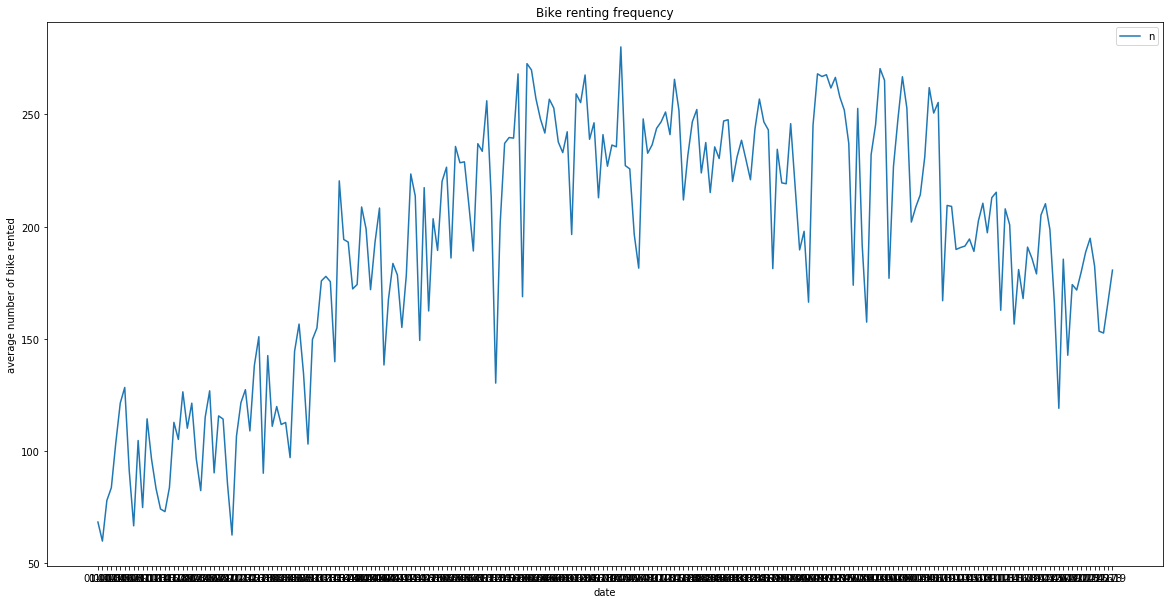

In [146]:
%matplotlib inline
#Which date have the most rented bikes in the dataset?
import matplotlib.dates as mdates

result = df.groupby(df['date']).mean()['count']
plt.figure(figsize=(20,10))

plt.plot(result.index,result)
plt.title('Bike renting frequency')
plt.xlabel('date')
plt.ylabel('average number of bike rented')
plt.legend('numbike')

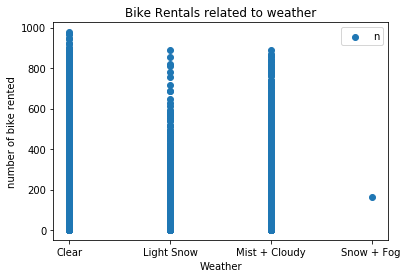

In [147]:

# Explore bike rentals in terms of weather
df[['weather_cat','week_day','count']]
plt.scatter(df['weather_cat'],df['count'])
plt.title('Bike Rentals related to weather')
plt.xlabel('Weather')
plt.ylabel('number of bike rented')
plt.legend('numbike')


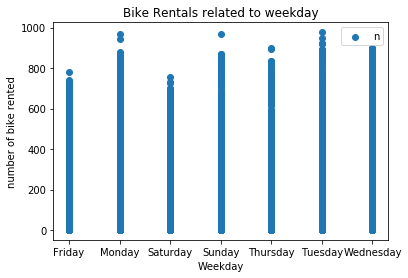

In [148]:
# Explore bike rentals in terms of weekday

plt.scatter(df['week_day'],df['count'])
plt.title('Bike Rentals related to weekday')
plt.xlabel('Weekday')
plt.ylabel('number of bike rented')
plt.legend('numbike')

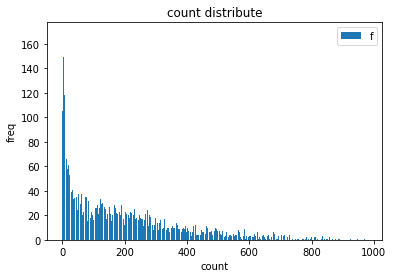

In [152]:
#plot the general distribution of "count" column (histogram)

dist = df.groupby(['count']).size()
plt.bar(dist.index,dist)
plt.title('count distribute')
plt.xlabel('count')
plt.ylabel('freq')
plt.legend('freq')


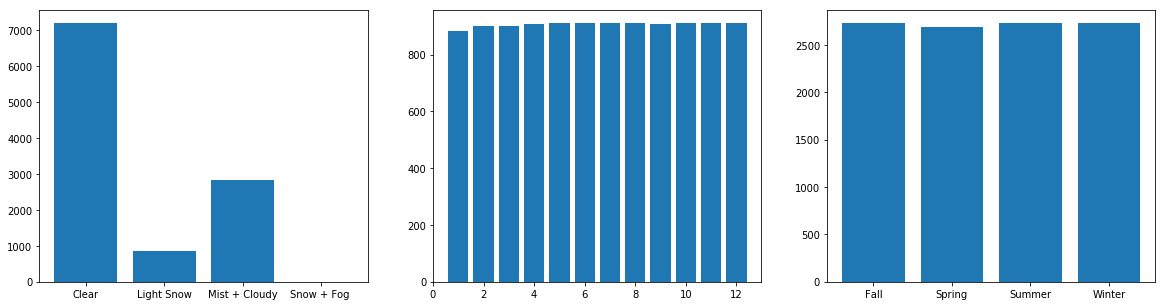

In [270]:
#explore what the most frequently seen weather/month/season
dist_weather = new_df.groupby(['weather_cat']).size()
dist_month = new_df.groupby(['month']).size()
dist_season = new_df.groupby(['season_cat']).size()
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=False)
ax1.bar(dist_weather.index,dist_weather)
ax2.bar(dist_month.index,dist_month)
ax3.bar(dist_season.index,dist_season)
fig.set_figheight(5)
fig.set_figwidth(20)
##bike is mostly rented on a clear day
##month and season has minimal effect on number of bike rented


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'date', 'season_cat', 'weather_cat', 'week_day'],
      dtype='object')


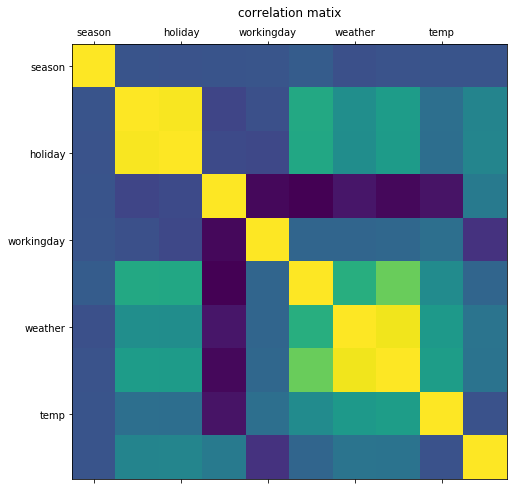

In [272]:
#explore correlation matrix and plots
fig, ax = plt.subplots()
ax.matshow(new_df.corr())
ax.set_title('correlation matix')
ax.set_xticklabels(['']+df.columns)
ax.set_yticklabels(['']+df.columns)
fig.set_figheight(8)
fig.set_figwidth(8)

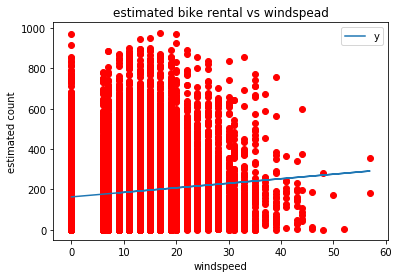

In [317]:
#use the package you choose to model a single variable regession
from scipy import stats
import numpy as np
x = df['windspeed']
y = df['count']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_estimated = df['windspeed'].apply(lambda x: slope*x + intercept).reset_index().set_index(df['windspeed'])
plt.plot(y_estimated.index,y_estimated['windspeed'])
plt.title('estimated bike rental vs windspead')
plt.xlabel('windspeed')
plt.ylabel('estimated count')
plt.legend('y*')
plt.scatter(x,y,color='r')

In [320]:
##define the cost function and calculate the corresponding cost 
def cost_function(data,x,y,slope,intercept):
    tol_var = 0
    ct = 0
    for i in data.index:
        temp_x = float(data[x][i])
        temp_y = float(data[y][i])
        tol_var += (slope * temp_x +intercept - temp_y)**2
        ct += 1
        
    return 1/(2*ct)*tol_var 
data = df[['count','windspeed']]
print('corresponding cost for (10) is {}'.format(cost_function(data,'windspeed','count',slope,intercept)))



corresponding cost for (10) is 16236.573908978904
